# FraudGraph Demo
This notebook walks through ETL → Graph → Community ranking on a simulated ring.


In [1]:
!python ../examples/simulate_ring.py --out ../data/sim_transactions.csv

Wrote 1450 rows to ../data/sim_transactions.csv


In [2]:
!python ../examples/run_pipeline.py --transactions ../data/sim_transactions.csv --out ../reports

Wrote markdown report to ../reports/report.md


Matplotlib is building the font cache; this may take a moment.


Top community size: 173 nodes, suspicion score: 0.327


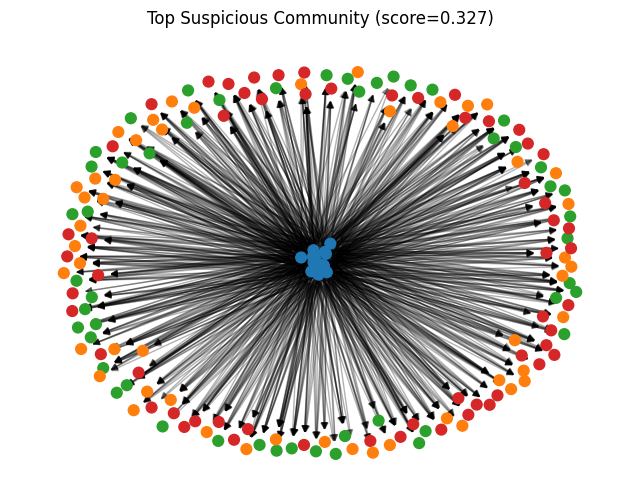

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from fraudgraph.etl import load_transactions, build_graph
from fraudgraph.algorithms import louvain_communities, rank_communities_by_suspicion

# Rebuild the graph from the synthetic transactions
df = load_transactions("../data/sim_transactions.csv")
G = build_graph(df)

# Detect communities and rank them
comms = louvain_communities(G)
ranked = rank_communities_by_suspicion(G, comms)

# Select the top suspicious community
top_score, top_nodes = ranked[0]
H = G.subgraph(top_nodes).copy()

print(f"Top community size: {len(H)} nodes, suspicion score: {top_score:.3f}")

# Assign colors by node type
colors = []
for n, data in H.nodes(data=True):
    if data.get("type") == "account":
        colors.append("tab:blue")
    elif data.get("type") == "device":
        colors.append("tab:orange")
    elif data.get("type") == "ip":
        colors.append("tab:green")
    elif data.get("type") == "instrument":
        colors.append("tab:red")
    else:
        colors.append("gray")

# Layout and plot
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(H, seed=42, k=0.5)
nx.draw_networkx_nodes(H, pos, node_color=colors, node_size=60)
nx.draw_networkx_edges(H, pos, alpha=0.3)
plt.title(f"Top Suspicious Community (score={top_score:.3f})")
plt.axis("off")
plt.show()


Open `../reports/report.md` to inspect top-ranked communities.